In [5]:
from IPython.display import Image

import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2

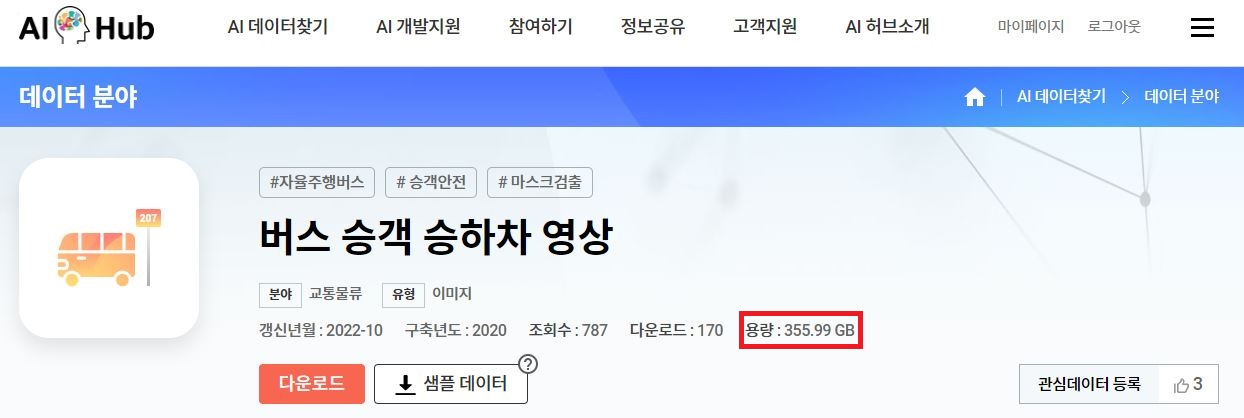

In [16]:
# 데이터셋 총 용량 (약 355Gbi)
Image('./00_img/1_데이터_용량.jpg')

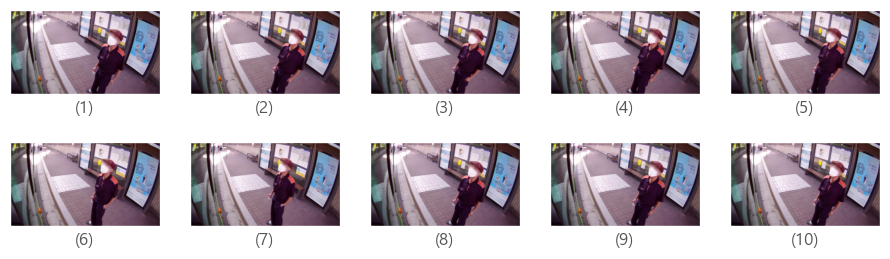

In [751]:
import os
os.getcwd() # 디렉터리 위치 리턴
os.chdir(r"C:\Users\admin\Desktop\ChaeBeom\imgdata\sample1") # 디렉터리 위치 변경

fig = plt.figure(figsize=(10,3)) 
rows = 2
cols = 5
i = 1
 
xlabels = ["xlabel", "(1)", "(2)", "(3)", "(4)", "(5)", "(6)", "(7)", "(8)", "(9)", "(10)"]

import glob
for filename in glob.glob("*.jpg"):
    img = cv2.imread(filename)
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_xlabel(xlabels[i])
    ax.set_xticks([]), ax.set_yticks([])
    i += 1

plt.tight_layout
plt.show()

In [ ]:
A, B, C 카메라 각각 27만장개씩 있음

각 폴더마다 [ 160장, 3fps - 53초 정도 영상? ]이 있음

위와 같은 식으로 각 카메라마다 승하차하는 승객들의 모습이 이미지 파일로 데이터셋을 이루고 있음

용량이 너무 크므로, 라벨 중 json파일로 제공하는 메타데이터에서 스켈레톤 포인트로 찍히는 x,y좌표만 모델에 넣어 쓰고자 함

In [544]:
# 승하차 라벨 데이터 파일 이름 모아진 리스트 만들기

PATH = './imgdata/label/'
label_f1 = []
label_f1_A = []
label_f1_B = []
label_f1_C = []

for i in os.listdir(PATH):
    label_f1.append(PATH+i)

###
for n in os.listdir(label_f1[0]):
    label_f1_A.append(label_f1[0]+'/'+n)

for n in os.listdir(label_f1[1]):
    label_f1_B.append(label_f1[1]+'/'+n)

for n in os.listdir(label_f1[2]):
    label_f1_C.append(label_f1[2]+'/'+n)

In [545]:
###

label_f1_A_fin = []
label_f1_B_fin = []
label_f1_C_fin = []

for i in range(len(label_f1_A)):
    for j in range(len(label_f1_A[i])):
        label_f1_A_fin.append(label_f1_A[i]+'/'+os.listdir(label_f1_A[i])[j])

for i in range(len(label_f1_B)):
    for j in range(len(label_f1_B[i])):
        label_f1_B_fin.append(label_f1_B[i]+'/'+os.listdir(label_f1_B[i])[j])

for i in range(len(label_f1_C)):
    for j in range(len(label_f1_C[i])):
        label_f1_C_fin.append(label_f1_C[i]+'/'+os.listdir(label_f1_C[i])[j])
        


# 승하차 관련 (General 카메라 A,B,C의 라벨 json파일 전체 리스트에 담기)
# for i in range(len(label_f1)):
#     for j in range(len(label_f1_A)):
#         for n in os.listdir(label_f1_A[j]):
#             label_Total.append(label_f1[i]+'/'+n)

In [490]:
print(len(label_f1_A_fin), len(A_file))
print(len(label_f1_B_fin), len(B_file))
# len(A_file)

280 14690
282 0


In [547]:
# 최종 json 파일명만 담은 list
A_file = []
B_file = []
C_file = []

for i in range(len(label_f1_A_fin)):
    for j in range(len(label_f1_A_fin[i])):
        A_file.append(label_f1_A_fin[i]+'/'+os.listdir(label_f1_A_fin[i])[j])
        
# for i in range(len(label_f1_B_fin)):
#     for j in range(len(label_f1_B_fin[i])):
#         B_file.append(label_f1_B_fin[i]+'/'+os.listdir(label_f1_B_fin[i])[j])
        
# for i in range(len(label_f1_C_fin)):
#     for j in range(len(label_f1_C_fin[i])):
#         C_file.append(label_f1_C_fin[i]+'/'+os.listdir(label_f1_C_fin[i])[j])

In [548]:
keypoints = []
get_on = []
get_off = []

for a in A_file:
    with open (a,"r") as j:
        contents = json.loads(j.read())
        if len(contents['annotations']) != 0:
            keypoints.append(contents['annotations'][0]['keypoints'])
            get_on.append(contents['annotations'][0]['get_on'])
            get_off.append(contents['annotations'][0]['get_off'])  

In [549]:
df = pd.DataFrame({'keypoints':keypoints,
                   'get_on':get_on,
                   'get_off':get_off})

In [556]:
get = []

# 0:get_off , 1:get_on , 2: nothing
for i in range(len(get_on)):
    if (df['get_on'][i] == False) and (df['get_off'][i] == False):
        get.append(2)
    elif (df['get_on'][i] == True) and (df['get_off'][i] == False):
        get.append(1)
    else:
        get.append(0)

df['status'] = get

In [596]:
df

,keypoints,get_on,get_off,status
0,"[1074, 1020, 2, 1111, 923, 2, 1151, 752, 2, 12...",True,False,1
1,"[1094, 918, 2, 1131, 802, 2, 1185, 643, 2, 131...",True,False,1
2,"[1085, 909, 2, 1118, 787, 2, 1174, 634, 2, 129...",True,False,1
3,"[1082, 908, 2, 1113, 786, 2, 1155, 627, 2, 127...",True,False,1
4,"[1071, 904, 2, 1102, 782, 2, 1144, 623, 2, 127...",True,False,1
...,...,...,...,...
7579,"[1378, 1004, 2, 1401, 927, 2, 1448, 833, 2, 15...",False,True,0
7580,"[1415, 1018, 2, 1469, 1024, 2, 1512, 889, 2, 1...",False,True,0
7581,"[1485, 1076, 0, 1485, 996, 0, 1551, 1013, 2, 1...",False,True,0
7582,"[1615, 1039, 0, 1588, 1007, 0, 1631, 1068, 0, ...",False,True,0


In [598]:
# A카메라 라벨 상태
df_0 = df[df['status']==0]
df_1 = df[df['status']==1]
df_2 = df[df['status']==2]

# 라벨 분포 개수 확인
print(len(df_0), len(df_1), len(df_2))
print(len(df) == len(df_0)+len(df_1)+len(df_2))


2260 1709 3615
True


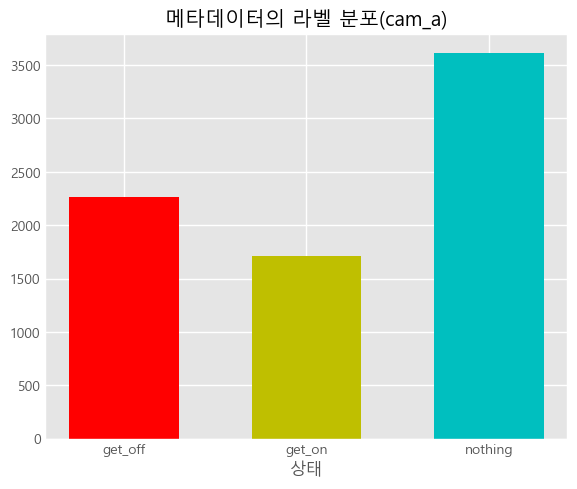

In [600]:
import warnings
warnings.filterwarnings(action='ignore')

label_a = ['get_off', 'get_on', 'nothing']
cam_a = [2260, 1709, 3615]

plt.style.use('ggplot')
plt.figure(figsize=[6,5])
plt.bar(label_a, cam_a, color=['r','y','c'], label=label_a, width=0.6)
plt.title('메타데이터의 라벨 분포(cam_a)')
plt.xlabel('상태')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

In [ ]:
A카메라의 승하차 여부만 파악했을 때, 승하차가 아닌 nothing의 이미지가 상당히 많이 포함되어 있음을 알 수 있음

승하차하는 과정을 찍은 것이므로, 승차(2260), 하차(1709) 건의 사진들에서 x와 y좌표를 모델에 입력할 수 있음

B,C 카메라의 승하차 여부까지 더해지면 - 

---